In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Data Understanding


In [2]:
#Reading the given dataset
df = pd.read_csv("day.csv")

#Cross checking first 5 rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


So, there are a total of 730 rows and 16 columns

In [3]:
#Checking the shape of the df
df.shape

(730, 16)

In [4]:
#Lets summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


So as such there are no null values in the dataset which is a very good news.

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


int64      11
float64     4
object      1
dtype: int64


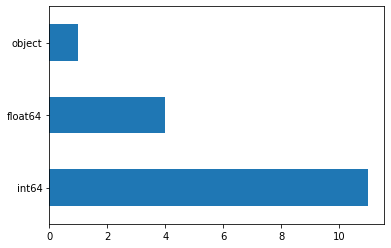

In [6]:
#Counting each type of datatype of the columns in the dataset
types = df.dtypes                      #Storing all the datatypes in a variable
print(types.value_counts())
types.value_counts().plot.barh()        #Visualization of each datatype through barplot 
plt.show()

So there are a total of 11 integer columns and based on the data dictionary some columns are actually CATEGORICAL columns whose input are in the form of binary that is 1 and 0 and some are encoded as 1 2 3 like that, so lets convert them to our required format for analysis.

In [7]:
#Checking for entire duplicate rows present in the dataset.
df.duplicated().sum()  #As the output is 0 it means that there are no two rows which are entirely identical.

0

In [8]:
#Checking the value counts for columns
for col in df.columns:
    print(df[col].value_counts())
    print("-----------------------")

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
-----------------------
09-11-2018    1
10-01-2018    1
27-12-2018    1
29-06-2018    1
01-05-2018    1
             ..
05-08-2019    1
12-05-2018    1
23-10-2019    1
29-06-2019    1
26-06-2019    1
Name: dteday, Length: 730, dtype: int64
-----------------------
3    188
2    184
1    180
4    178
Name: season, dtype: int64
-----------------------
1    365
0    365
Name: yr, dtype: int64
-----------------------
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
-----------------------
0    709
1     21
Name: holiday, dtype: int64
-----------------------
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
-----------------------
1    504
0    226
Name: workingday, dtype: int64
-----------------------
1    463
2    246
3     21
Na

# Data Cleaning

Lets change some columns to CATEGORICAL columns from int columns. These columns are season, month, weekday and weathersit.
We will also encode them differently for better understanding and readability.

In [9]:
#Changing the values of each columns appropriatly.

#Season column - Based on data dictionary
df.loc[(df['season'] == 1) , 'season'] = 'spring'       # 1=spring
df.loc[(df['season'] == 2) , 'season'] = 'summer'       # 2=summer
df.loc[(df['season'] == 3) , 'season'] = 'fall'         # 3=fall
df.loc[(df['season'] == 4) , 'season'] = 'winter'       # 4=winter

#Month column - Based on data dictionary
df[['mnth']] = df[['mnth']].apply(lambda x: x.map(
    {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}))

#Weekday column - Based on data dictionary
df[['weekday']] = df[['weekday']].apply(lambda x: x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}))

#Weathersit column - Based on data dictionary
df.loc[(df['weathersit'] == 1) , 'weathersit'] = 'A'  # 1-Clear, Few clouds, Partly cloudy, Partly cloudy
df.loc[(df['weathersit'] == 2) , 'weathersit'] = 'B'  # 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df.loc[(df['weathersit'] == 3) , 'weathersit'] = 'C'  # 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df.loc[(df['weathersit'] == 4) , 'weathersit'] = 'D'  # 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
#Now changing these four columns dtype to categorical
df['season'] = df['season'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


In [12]:
#value_counts of these columns
cat_cols = ["season", "mnth", "weekday", "weathersit"]

for i in cat_cols:
    print(df[i].value_counts())
    print("------------------")

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
------------------
Oct     62
May     62
Mar     62
Jul     62
Jan     62
Dec     62
Aug     62
Sept    60
Nov     60
Jun     60
Apr     60
Feb     56
Name: mnth, dtype: int64
------------------
Wed      105
Thurs    105
Tues     104
Sun      104
Sat      104
Mon      104
Fri      104
Name: weekday, dtype: int64
------------------
A    463
B    246
C     21
Name: weathersit, dtype: int64
------------------


Some columns are unneccessary for the analysis which are instant, dteday, casual and registered.
As 
-  instant is basically the index column which will not help in anyway for model building
-  dteday also is unneccessary as there are separated columns for month and year
-  casual and registered sum is the column cnt so these two columns can be dropped as our focus will be on the cnt column due to this correlation between them will be high as if one increase then the other is bound to increase.

In [13]:
df.drop(labels = ["instant", "dteday", "casual", "registered"], inplace = True, axis = 1)

In [14]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# EDA

In [15]:
# Trying auto EDA based on the library mentioned in one of the class by an instructor. 
# NOTE :- But will analyse again just trying out.
#!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

A Jupyter Widget

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Now lets proceed with our normal visualization

In [16]:
#Lets start with Visualising Numeric Variables
df["cnt"] = df["cnt"].astype("float64")
df_numeric = df.select_dtypes(include=['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


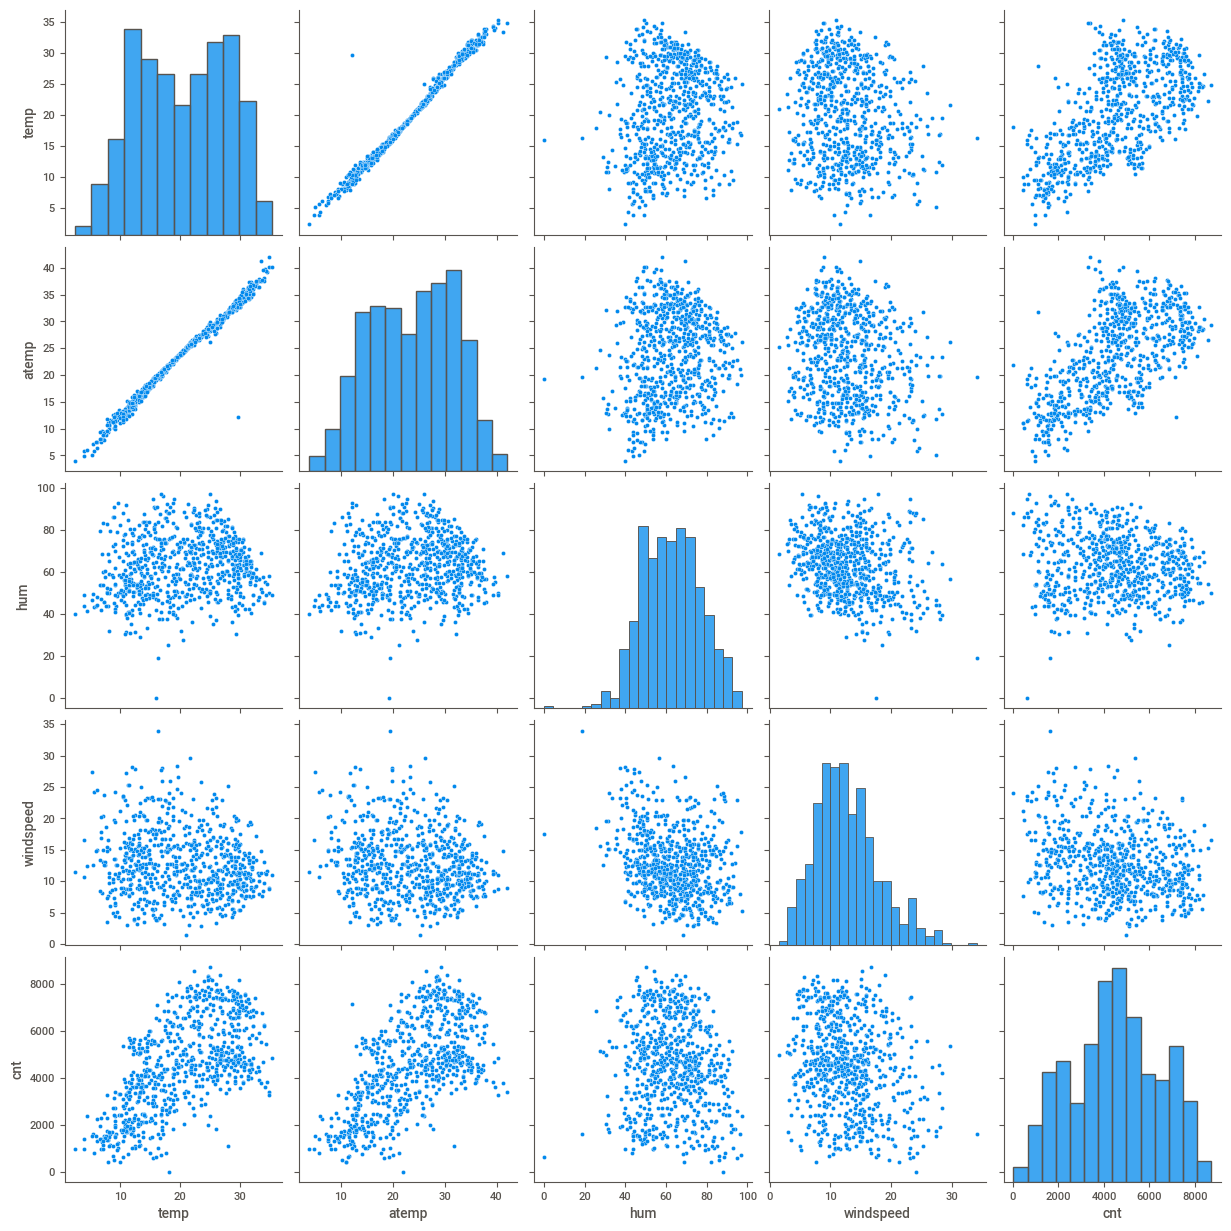

In [17]:
sns.pairplot(df_numeric)
plt.show()

In [18]:
#Correlation matrix
cor = df_numeric.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


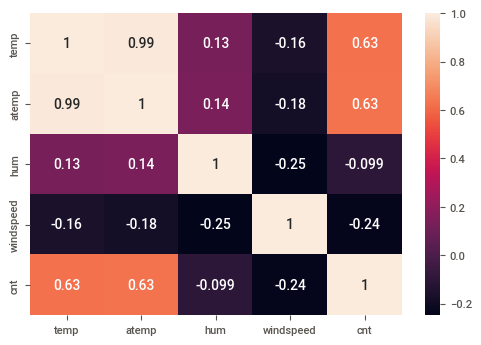

In [19]:
#Plotting heatmap for it
sns.heatmap(cor,annot=True)
plt.show()

Insights from the above heatmap:
-  The cnt is negatively correlated with 'windspeed' (approximately -0.24), which suggests that there is a slight indication that the demand for shared bikes tends to be lower on windy days in comparison to normal days. <br>
-  atemp and temp are highly positively correlated. As one can say those are dependent based on the data dictionary. So, lets drop atemp<br>
-  there is also a significant high correlation between cnt and temp and cnt and atemp.<br>


Will have to look out for Multicollinearity.

In [20]:
df.drop(labels = ["atemp"], inplace = True, axis = 1)

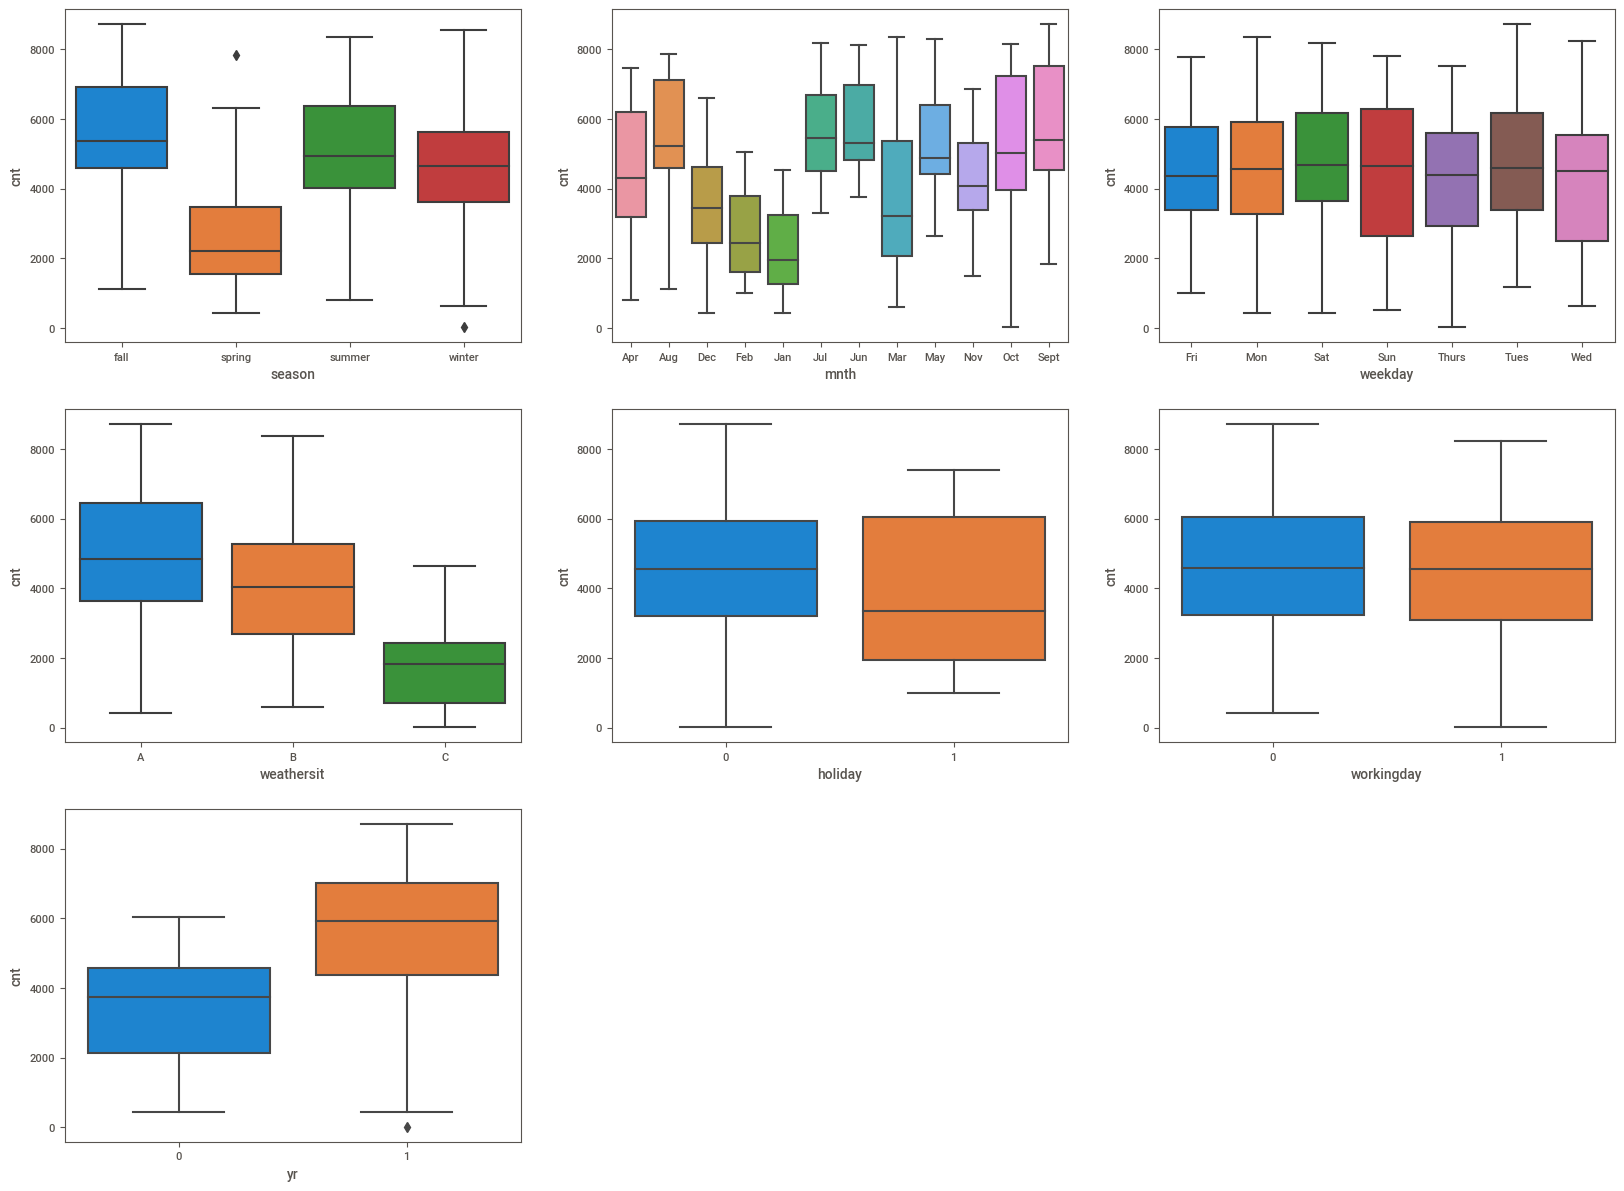

In [21]:
#Visualising Categorical Variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)   #this is also a categorical column based on data dictionary
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)  #this is also a categorical column based on data dictionary
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)   #As there are only two distinct entries available which are 2018 and 2019, so including in categorical
plt.show()

In [22]:
#Defining a function for analysing categorical columns.
def plot_func(df,col):
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.barplot(col, "cnt", data=df)
    
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=df, hue='yr')
    plt.xticks(rotation=45)
    
    plt.show()

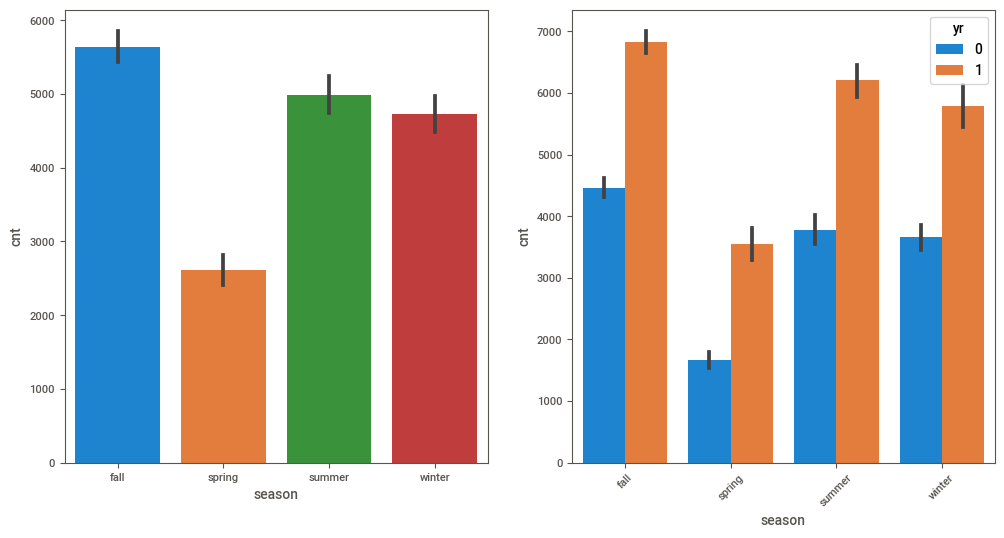

In [23]:
plot_func(df,"season")

The fall season appears to have garnered greater interest in bookings, with a significant year-over-year increase in reservations from 2018 to 2019 across all seasons.

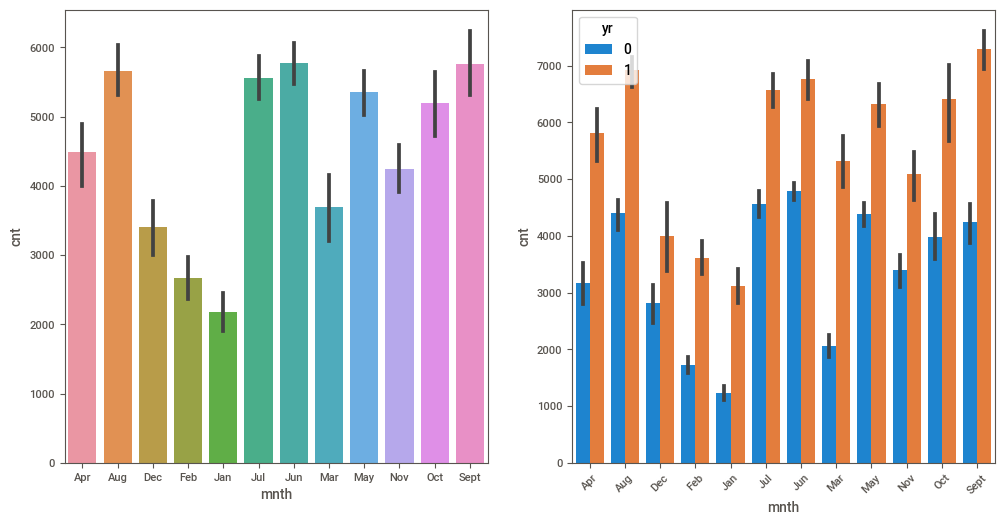

In [24]:
plot_func(df,"mnth")

The majority of bookings occurred in the months of May, June, July, August, September, and October. The trend showed a rise from the beginning of the year until the middle of the year, followed by a decline towards the end of the year. The number of bookings for each month saw an increase from 2018 to 2019.

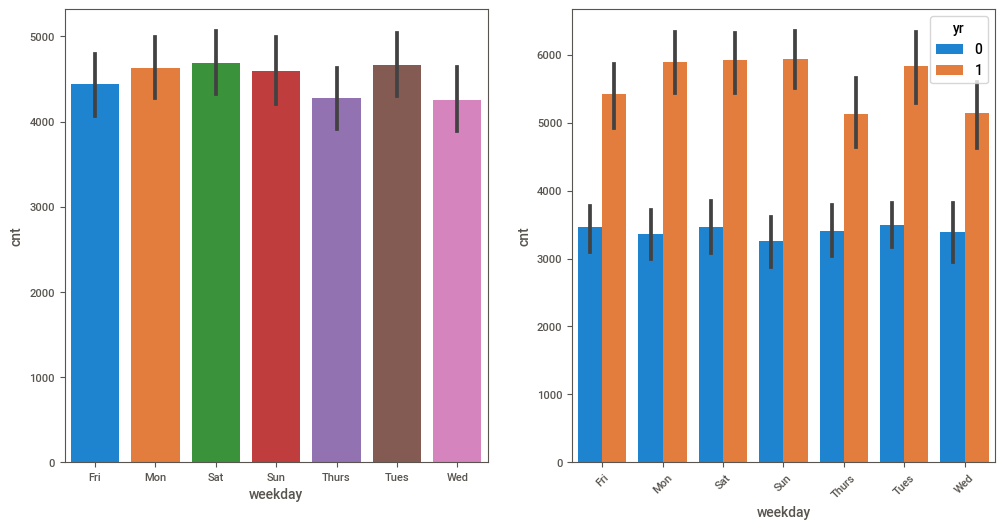

In [25]:
plot_func(df,"weekday")

Thursday, Friday, Saturday, and Sunday exhibit a higher volume of bookings compared to the other days of the week.

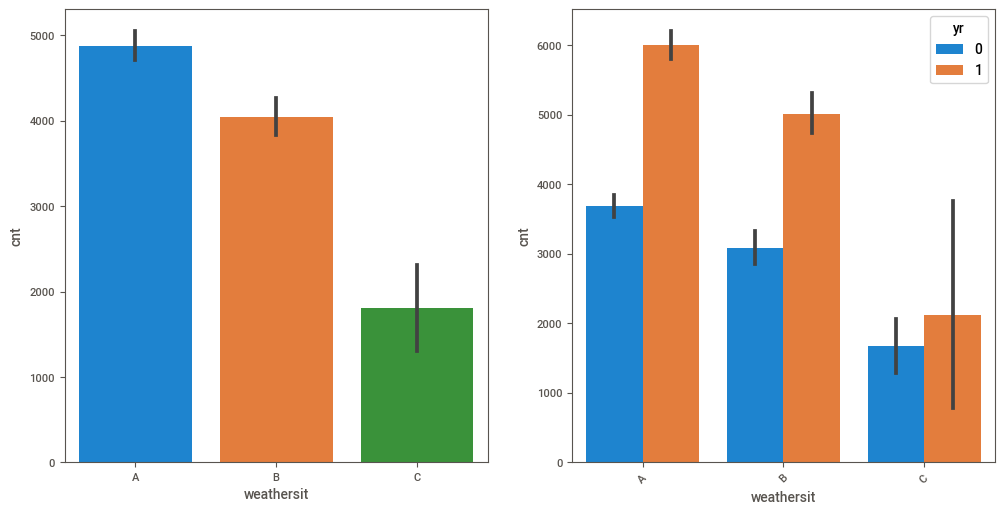

In [26]:
plot_func(df,"weathersit")

It's evident that clear weather conditions attracted more bookings, which is quite expected. Furthermore, in comparison to 2018, bookings increased for each type of weather situation in 2019.

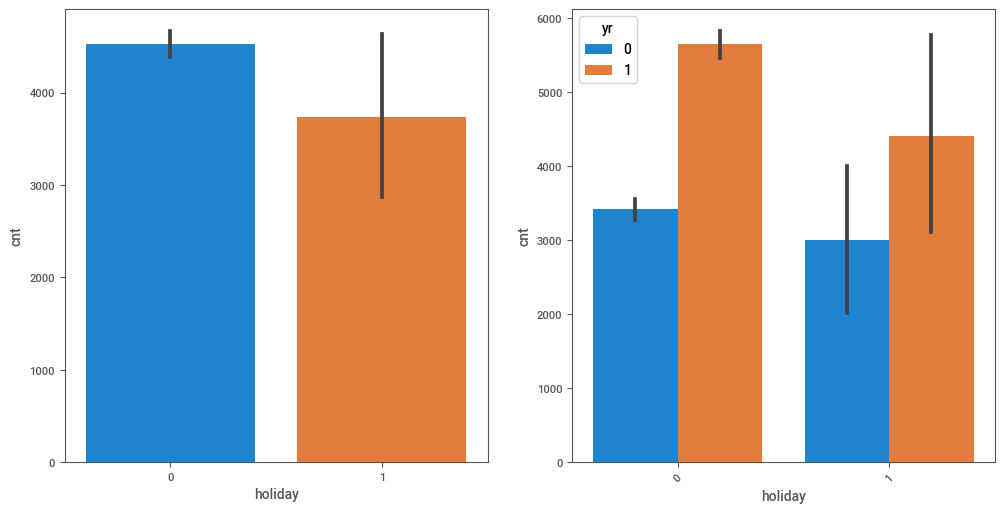

In [27]:
plot_func(df,"holiday")

When it's not a holiday, the number of bookings tends to be lower, which is a reasonable observation since people may prefer to stay at home and spend quality time with their families during holidays.

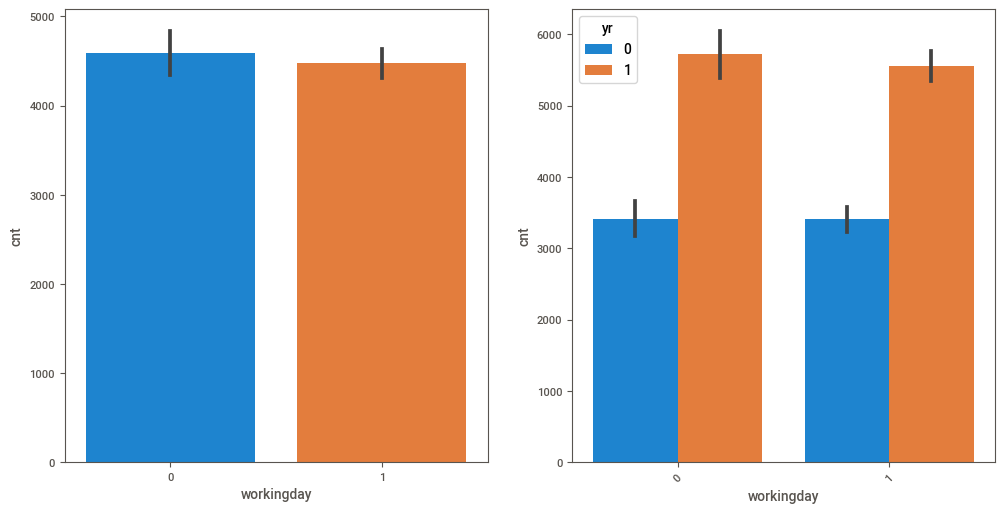

In [28]:
plot_func(df,"workingday")

Bookings appeared to be nearly equal on both working days and non-working days. However, there was an increase in the booking count from 2018 to 2019.

# Data preparation for Modelling

In [29]:
#Creating a df which contains only categorical columns
df_cate = df.select_dtypes(include=['category'])

In [30]:
#Creating dummy variables for the categorical columns
df_dummy = pd.get_dummies(df_cate, drop_first=True)
df_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
#Now dropping these categorical columns from the original dataset.
df = df.drop(list(df_cate.columns), axis=1)

In [32]:
#Then concating the dummies dataset created above to the original dataset.
df = pd.concat([df, df_dummy], axis=1)

#checking the first few rows
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Model Building

In [33]:
#Splitting the dataframe in the sizes of 70 and 30 respective the train and test.
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [34]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [35]:
#Some of the columns need Rescaling, so lets rescale them using MinMaxScaler
scaler = MinMaxScaler()

In [36]:
#We only need to scale only the numeric variables.
num_cols = ["temp", "hum", "windspeed", "cnt"]
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [37]:
#Cross-checking
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


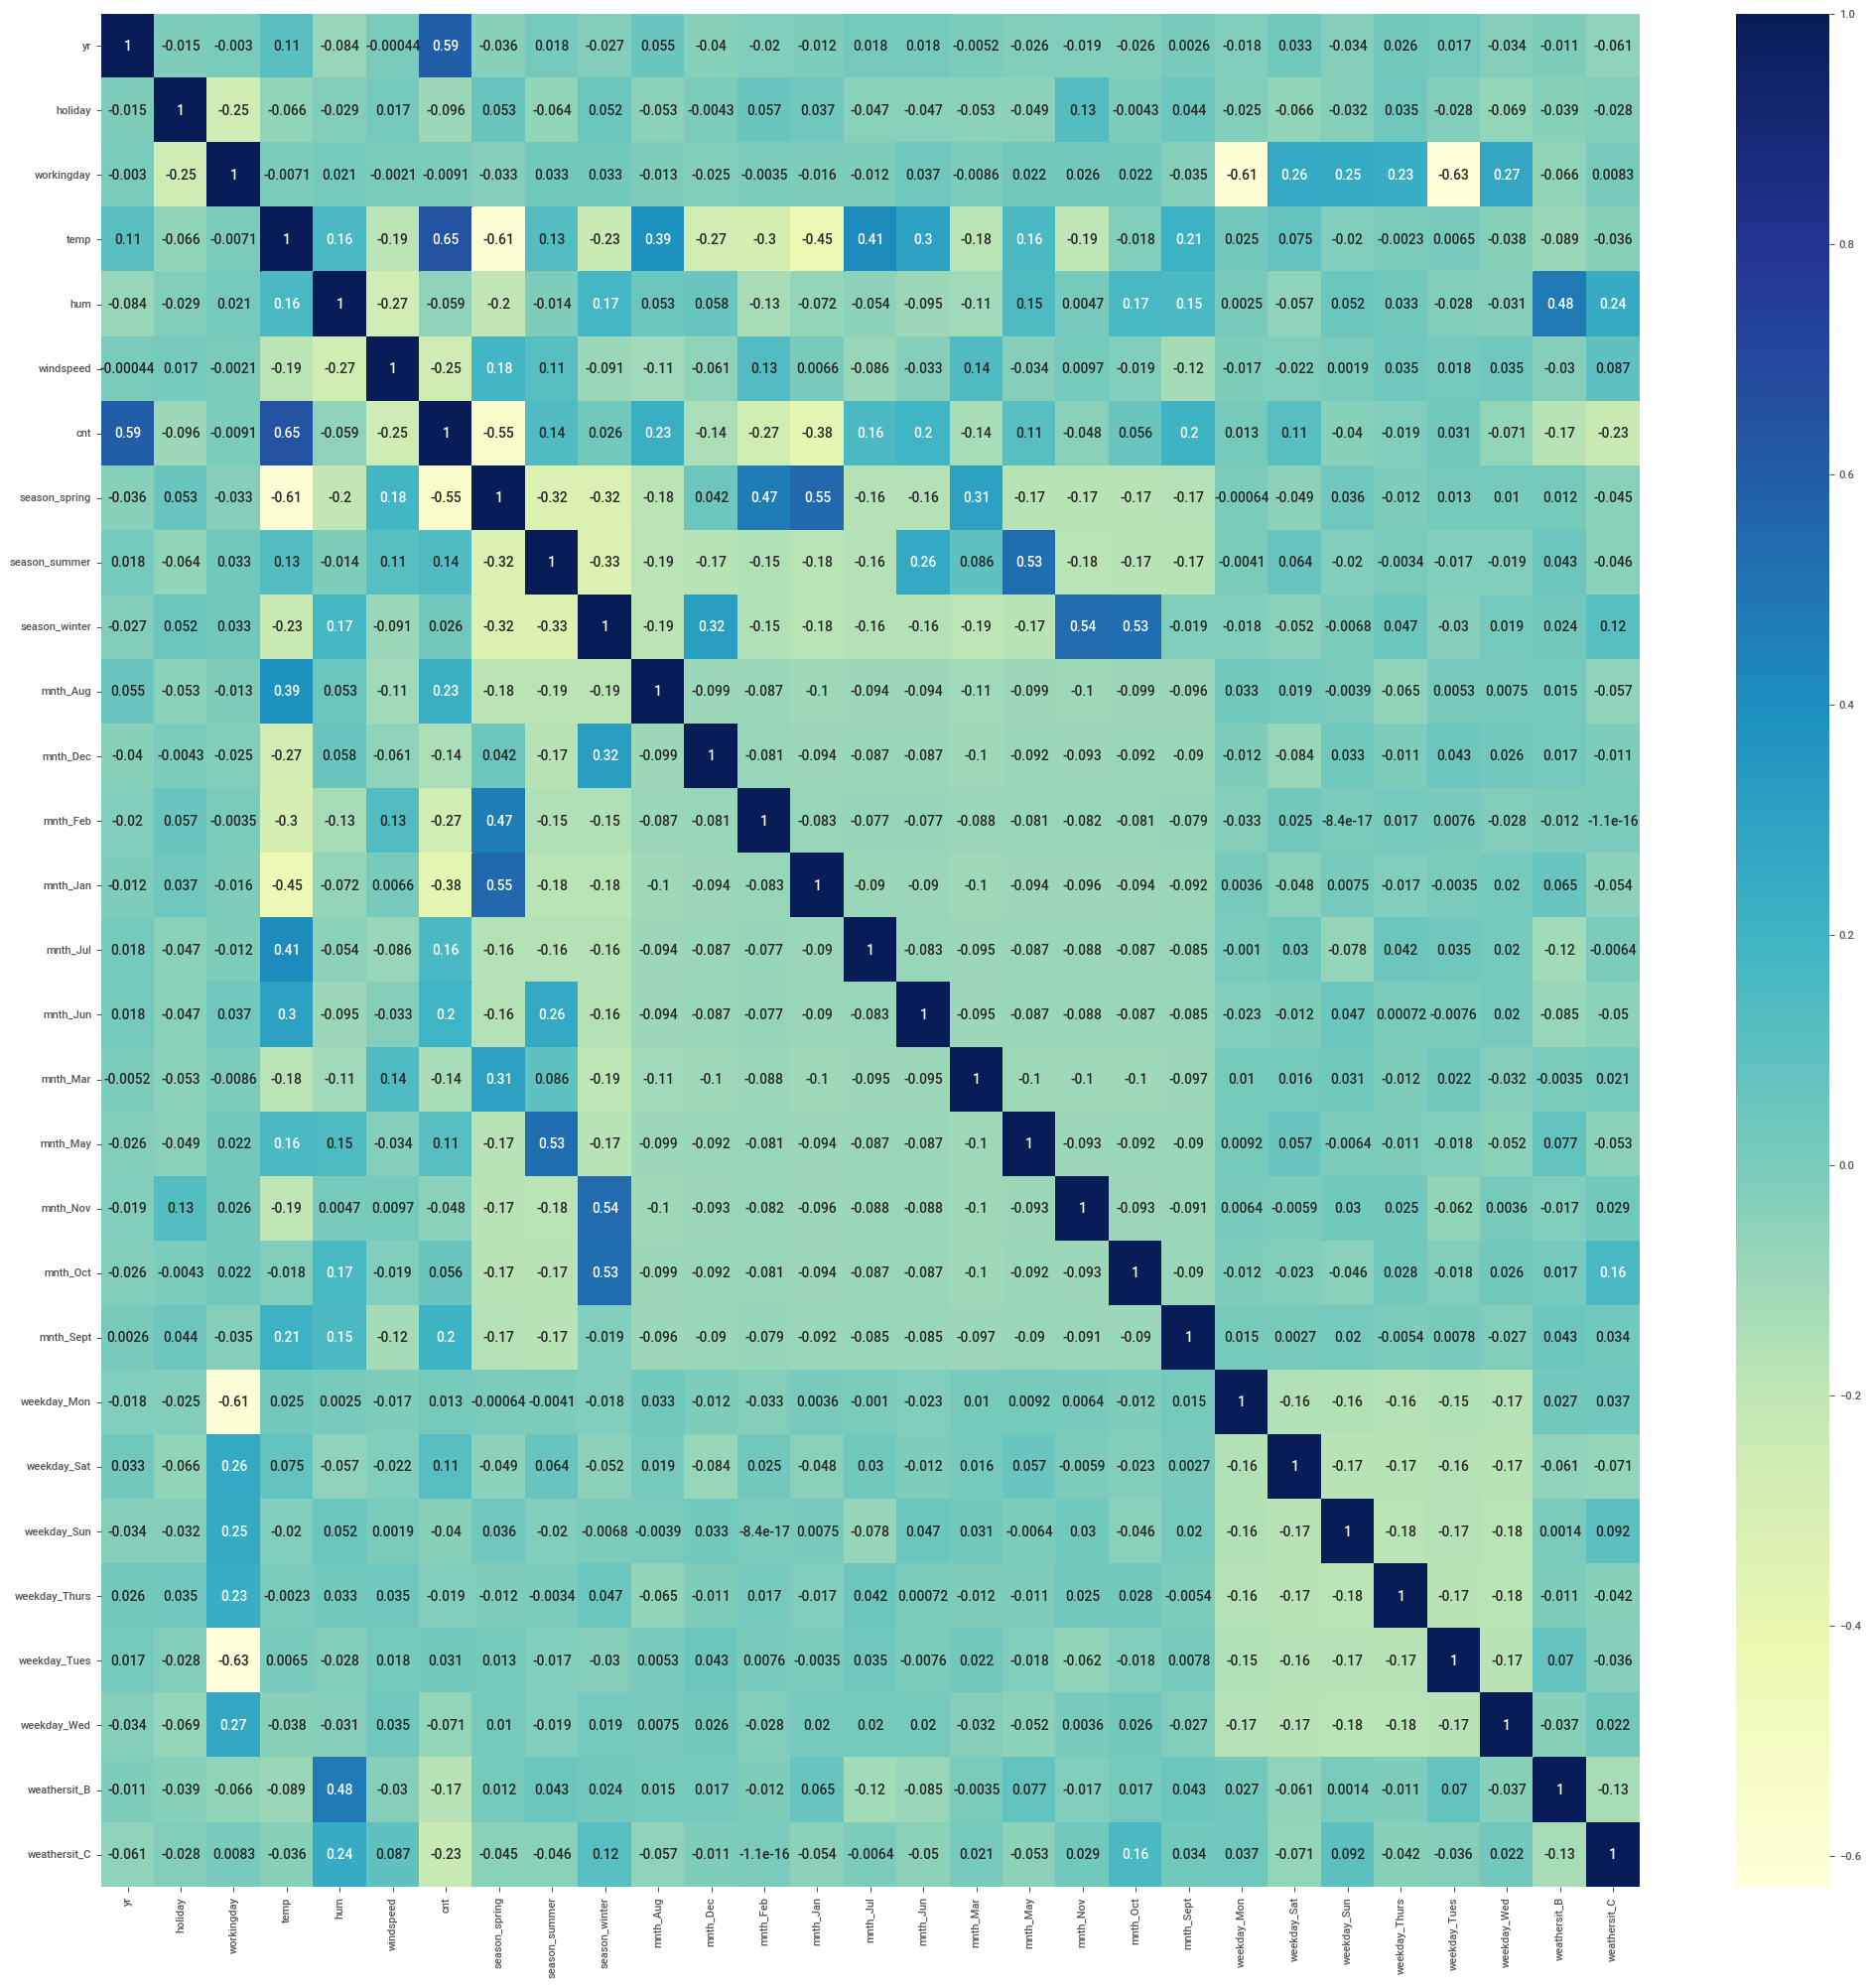

In [39]:
#Checking the correlation for finding the highly correlated variables
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above figure it seems that cnt have high correlation with temp followed by year. Winter also have high correlation with month octomber and november. Summer high correlation with may.

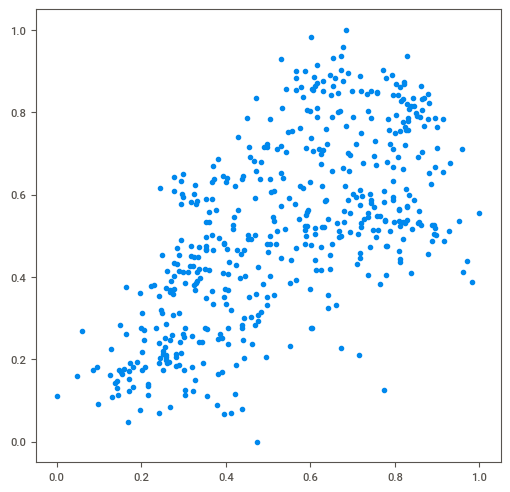

In [40]:
#Using scatterplot to visualize them.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [41]:
#Dividing into X and y sets for linear model.
y_train = df_train.pop('cnt')
X_train = df_train

### Building linear model using RFE

In [42]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [43]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 6),
 ('weekday_Tues', False, 5),
 ('weekday_Wed', False, 7),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [44]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_B', 'weathersit_C'],
      dtype='object')


In [45]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [47]:
# Generic function to calculate VIF of variables

def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [48]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [49]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
13,weathersit_B,2.32
0,yr,2.09
11,mnth_Nov,1.85
9,mnth_Jan,1.75


In [50]:
#Building linear model
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          8.15e-189
Time:                        22:10:53   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [52]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.95
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
10,mnth_Nov,1.81
8,mnth_Jan,1.66
9,mnth_Jul,1.59
12,weathersit_B,1.57


In [53]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          4.75e-186
Time:                        22:11:05   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618

In [54]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_Nov'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
6,season_winter,2.05
8,mnth_Jan,1.65
9,mnth_Jul,1.59
11,weathersit_B,1.57
10,mnth_Sept,1.34


In [55]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          2.74e-186
Time:                        22:11:12   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2283      0.031      7.310

In [56]:
# We can drop mnth_Dec variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_Dec'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,season_spring,2.75
5,season_summer,2.24
0,yr,2.07
6,season_winter,1.78
7,mnth_Jan,1.61
8,mnth_Jul,1.59
10,weathersit_B,1.56
9,mnth_Sept,1.34


In [57]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          8.14e-187
Time:                        22:11:17   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [58]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_Jan'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.78
7,mnth_Jul,1.58
9,weathersit_B,1.55
8,mnth_Sept,1.34
10,weathersit_C,1.08


In [59]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          5.06e-187
Time:                        22:11:25   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [60]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_Jul'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
8,weathersit_B,1.55
7,mnth_Sept,1.23
9,weathersit_C,1.08
1,holiday,1.04


In [61]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.47e-186
Time:                        22:11:33   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447

In [62]:
# Checking the parameters and their coefficient values
lr_6.params

const            0.190855
yr               0.234132
holiday         -0.096316
temp             0.477737
windspeed       -0.148098
season_spring   -0.055406
season_summer    0.062076
season_winter    0.094476
mnth_Sept        0.090998
weathersit_B    -0.078741
weathersit_C    -0.285031
dtype: float64

#### Residual analysis

In [63]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Sept,weathersit_B,weathersit_C
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,1,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1,0
79,1.0,0,0,0.462664,0.529881,0,1,0,0,1,0


In [64]:
y_train_pred = lr_6.predict(X_train_lm_6)

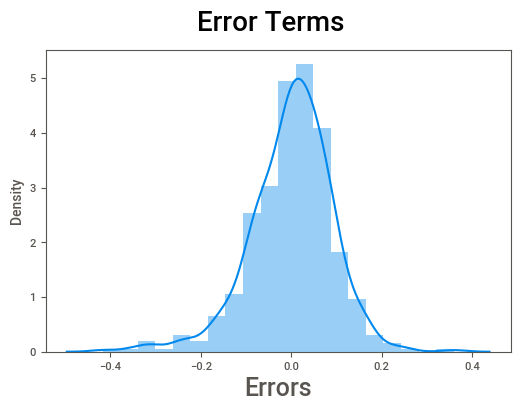

In [65]:
#Normality of error terms
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Error terms are following normal distribution

In [67]:
#Multi Colinearity
VIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
8,weathersit_B,1.55
7,mnth_Sept,1.23
9,weathersit_C,1.08
1,holiday,1.04


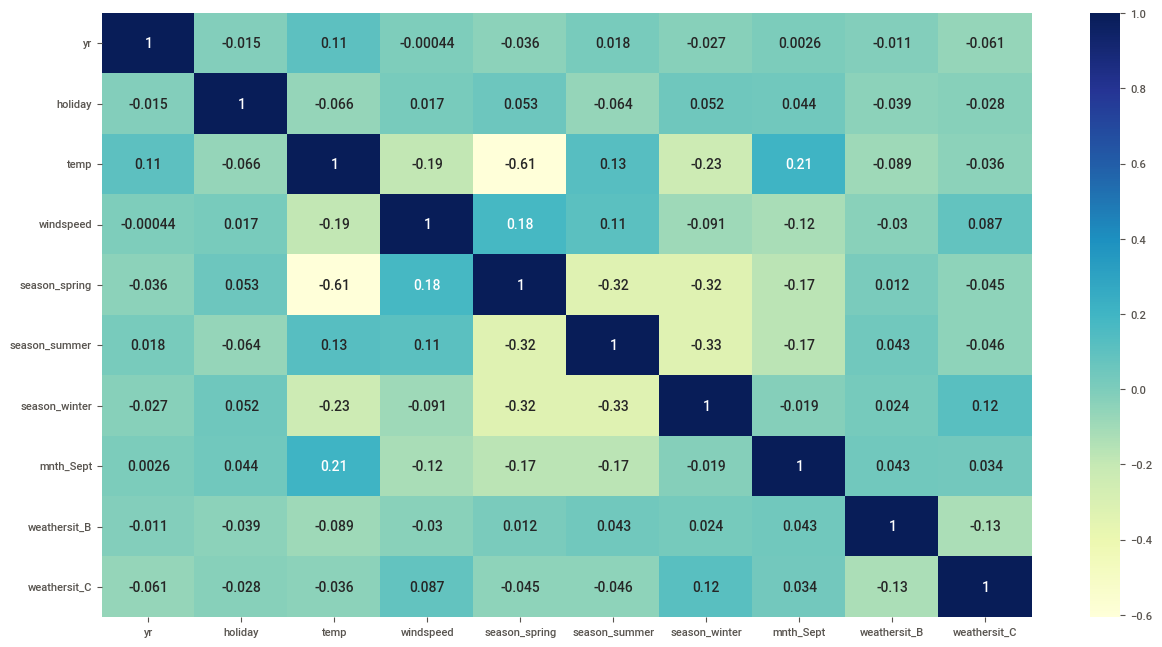

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

All the VIF values are less than 5 which is good and also there is no multicolinearity which can be seen from the heatmap.

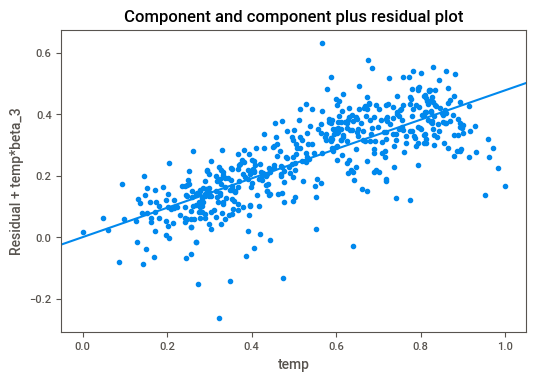

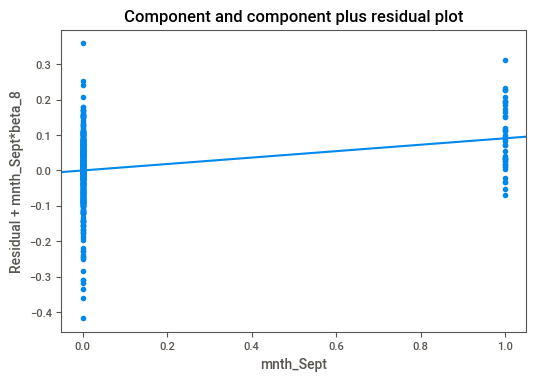

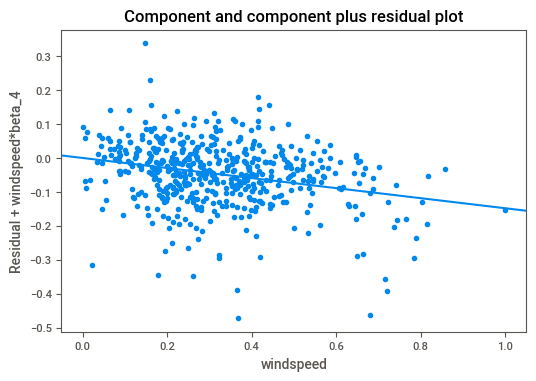

In [69]:
#Linearity
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'mnth_Sept')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

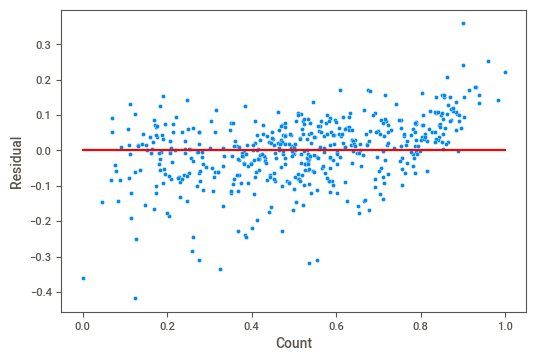

In [70]:
#Homoscedasticity
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Independence of residuals
Durbin-Watson value of final model lr_6 is 2.085, which signifies there is not much autocorrelation.


#### Making Predictions

In [71]:
#Scaling in test dataset
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.172727,0.140909,0.131818,0.122727,0.154545,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.378873,0.348721,0.339064,0.328872,0.362295,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [75]:
#Making predictions
y_pred = lr_6.predict(X_test_lm_6)

In [76]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

#### Model Evaluation

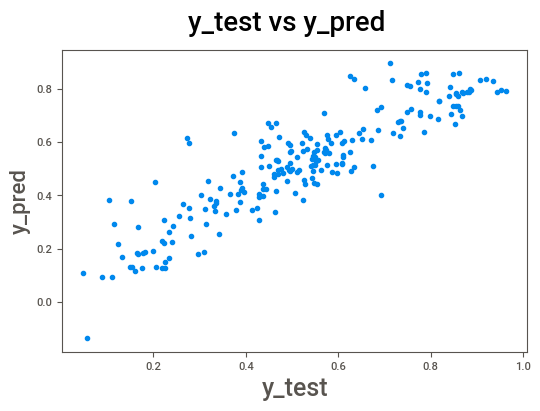

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [78]:
round(lr_6.params,4)

const            0.1909
yr               0.2341
holiday         -0.0963
temp             0.4777
windspeed       -0.1481
season_spring   -0.0554
season_summer    0.0621
season_winter    0.0945
mnth_Sept        0.0910
weathersit_B    -0.0787
weathersit_C    -0.2850
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.4777 \times  temp - 0.1481  \times  windspeed + 0.2341 \times yr + 0.0621 \times season_summer - 0.0554 \times season_spring + 0.0945 \times season_winter - 0.0787 \times weathersit_B + 0.0910 \times mnth_Sept - 0.2850 \times weathersit_C - 0.1963 \times holiday $

In [79]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


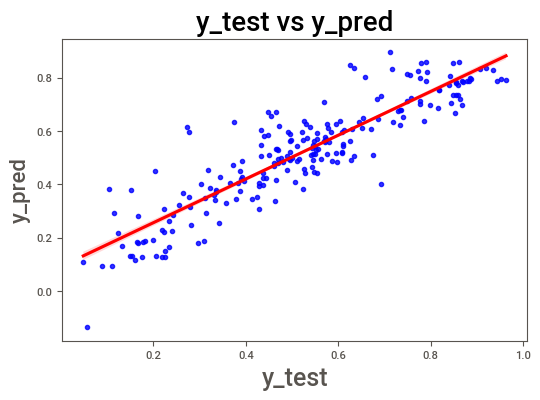

In [80]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944